In [1]:
import pandas as pd
import os
import numpy as np
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

This is for filling in missing rain gage values using 3 other neabry rain stations. If you choose to use radar rain gage values it is best to first fill all of the rain gage stations individually and then fill radar gage missing nan values

In the future, you should fill the rain gage stations with radar if it is available for that area of interest?...

# Read in the files for the code below

In [36]:
#avg monthly rain gage file:
avg_hourly_rain_file = '04_avg.csv'

#dataframe of rain gage names, datetime, rf values
all_rain_gages_data =  '2018-12-29_2018-12-30GSSHA_rain_gagesFILLNA.csv'


#radar file
radar_rainfall = 'all_rain_gage.csv'

In [37]:
#read raster avg rainfall monthly values for each gage
rain_meta = pd.read_csv(avg_hourly_rain_file).filter(['FILENAME','RASTERVALU'], axis=1)

#read all the gage data for time period
gages_data = pd.read_csv(all_rain_gages_data)

#read radar rain gage file
radar_gage = pd.read_csv(radar_rainfall)

# Add radar rain gage if needed

In [38]:
#df = radar_gage.drop_duplicates(subset='datetime')

#select date
start = all_rain_gages_data[0:10]
end = all_rain_gages_data[11:21] + (' 01:00')

In [39]:
start

'2018-12-29'

In [40]:
#select date
start = all_rain_gages_data[0:10]
end = all_rain_gages_data[11:21] + (' 01:00')

#drop duplicates from the radar gage file?
df = radar_gage.drop_duplicates(subset='datetime')

#Use the start and end date to select the radar data and fill it into radar test
radar_from_dates = df.loc[df['datetime'].between(start, end)].rain_mm.tolist()
gages_data['RADAR'] = radar_from_dates

#according to HUANG, nan = 0 (no rainfall or no data, assume it is 0 with this)
gages_data ['RADAR_nocalculation'] = np.nan
for i in range(0, len(gages_data)):
    if np.isnan(gages_data.RADAR[i]):
        gages_data['RADAR_nocalculation'][i] = 0
    else:
        gages_data['RADAR_nocalculation'][i] = gages_data.RADAR[i].copy()

C:\Users\bgorb\AppData\Local\Temp\ipykernel_24852\4185028943.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gages_data['RADAR_nocalculation'][i] = gages_data.RADAR[i].copy()
C:\Users\bgorb\AppData\Local\Temp\ipykernel_24852\4185028943.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gages_data['RADAR_nocalculation'][i] = 0


In [41]:
gages_data.head(50)

Unnamed: 0             DateTime   HI-41   HI-45   KPIH1   PRIH1  \
0            0  2018-12-29 00:00:00   0.254   0.508   0.000   0.000   
1            1  2018-12-29 01:00:00   0.508   2.286   0.000   0.254   
2            2  2018-12-29 02:00:00   0.762   0.000   0.000   0.000   
3            3  2018-12-29 03:00:00   0.254   2.032   0.000   0.254   
4            4  2018-12-29 04:00:00   0.254   2.794   0.254   4.572   
5            5  2018-12-29 05:00:00   0.000   0.508   0.254   1.778   
6            6  2018-12-29 06:00:00   0.000   0.000   0.000   0.000   
7            7  2018-12-29 07:00:00   0.762   0.508   0.254   0.254   
8            8  2018-12-29 08:00:00   0.254   0.508   1.270   0.254   
9            9  2018-12-29 09:00:00  12.446  22.352   7.112   1.270   
10          10  2018-12-29 10:00:00  37.592  66.548  25.400  28.702   
11          11  2018-12-29 11:00:00  22.860  14.732   0.000  10.160   
12          12  2018-12-29 12:00:00   2.540   1.524   0.000   0.000   
13          13  2018-12-29 13:00:00   0.000   0.000   0.000   0.000   
14          14  2018-12-29 14:00:00   0.000   0.000   0.000   0.000   
15          15  2018-12-29 15:00:00   0.000   0.000   0.000   0.000   
16          16  2018-12-29 16:00:00   0.000   0.000   0.000   0.000   
17          17  2018-12-29 17:00:00   0.000   0.000   0.000   0.000   
18          18  2018-12-29 18:00:00   0.000   0.000   0.000   0.000   
19          19  2018-12-29 19:00:00   0.000   0.000   0.000   0.000   
20          20  2018-12-29 20:00:00   0.000   0.000   0.000   0.000   
21          21  2018-12-29 21:00:00   0.000   0.000   0.000   0.000   
22          22  2018-12-29 22:00:00   0.000   0.000   0.762   0.000   
23          23  2018-12-29 23:00:00   0.000   0.000   1.270   0.762   
24          24  2018-12-30 00:00:00   0.000   0.000   0.000   0.000   

    USC00514561  USC00518165  USGS_uv220356159281401  USGS_uv220427159300201  \
0           NaN        0.508                   0.000                   0.000   
1           NaN        2.032                   0.000                   0.254   
2           NaN        0.508                   0.000                   0.000   
3           NaN        1.270                   0.000                   0.254   
4           NaN        5.080                   0.000                   0.508   
5           NaN        3.556                   0.254                   0.254   
6           NaN        0.000                   0.000                   0.254   
7           NaN        0.254                   0.000                   0.000   
8           NaN        0.762                   0.254                   0.508   
9           NaN        3.302                   7.112                   3.556   
10          NaN       48.260                  29.972                  32.512   
11          NaN       17.018                  21.082                  42.926   
12          NaN        0.254                   0.508                   1.270   
13          NaN        0.000                   0.000                   0.000   
14          NaN        0.000                   0.000                   0.000   
15          NaN        0.000                   0.000                   0.000   
16          NaN        0.000                   0.254                   0.254   
17          NaN        0.000                   0.000                   0.254   
18          NaN        0.000                   0.000                   0.254   
19          NaN        0.000                   0.000                   0.000   
20          NaN        0.000                   0.000                   0.254   
21          NaN        0.000                   0.254                   0.254   
22          NaN        0.000                   0.762                   1.270   
23          NaN        0.254                   0.508                   1.524   
24          NaN        0.000                   0.254                   0.762   

    USGS_uv220443159235601  USGS_uv221101159280801   WUHH1     RADAR  \
0   

# Open Up Average mm/hr Rain File from ArcGIS calculation

In [6]:
#read raster values
rain_meta = pd.read_csv(avg_hourly_rain_file)
avg_rain = rain_meta.filter(['FILENAME','RASTERVALU'], axis=1)

#read gage data
gages_data = pd.read_csv(all_rain_gages_data)

# Determine which rain gauges have missing values

In [7]:
#get the names of gages from columns
gages_names = (gages_data.columns.tolist())[2:]
n = len(gages_data)
#Find out which columns have missing values... 
for i in range(0, len(gages_names)):
    name = gages_names[i]
    na_val = gages_data[name].isna().sum()
    print(name +' = '+ str(na_val) + ' NaN')

print('')
print('DURATION OF DATA (hr): ' + str(n))

DateTime = 0 NaN
HI-41 = 16 NaN
HI-45 = 0 NaN
KPIH1 = 0 NaN
PRIH1 = 0 NaN
USC00514561 = 0 NaN
USC00518165 = 0 NaN
USGS_uv220356159281401 = 0 NaN
USGS_uv220427159300201 = 0 NaN
USGS_uv220443159235601 = 73 NaN
USGS_uv221101159280801 = 0 NaN
WUHH1 = 0 NaN
RADAR_TEST = 31 NaN
RADAR_TEST_nocalculation = 0 NaN

DURATION OF DATA (hr): 73


# Calculations Normal Ratio Method for incomplete or 100% empty rain gages

It is important to NOTE:
-3 gages are required
-all 3 gages must have 100% pure raw rainfall data for best accuracy
-if any of the selected gages have missing rainfall data... the output of the function will produce nan. YOU MUST do the function however many times and then combine the best data

Example:
x1 = nan,2 ; x2=1,nan ; x3=2,3 ;  x4 = 1,2 x5 = nan, nan
if I choose x4, x2, x3 to find x5 : then the output of x5 will be 1, nan (1 was a random number)
I must then repeat the function doing
x4, x2, x3, to find x5 : then the output of x5 will be nan, 1 (1 was a random number)

THEN: i combine the two to get the best estimate of x5 : 1,1

.... HOPE this makes sense lol

In [9]:
Calculated_dict = {}

#(dataframe, dataframe, list, list)
def norm_ratio(gages_data, avg_rain, station_of_interest, select_gages):


    holding_dict = {}
    #some data formatting stuff.......
    normal_rain_C1 = avg_rain.loc[avg_rain['FILENAME'].isin(select_gages)]
    gages = normal_rain_C1['FILENAME'].tolist() ; rain = normal_rain_C1['RASTERVALU'].tolist()
    nr_C1_dict = {}
    for i in range(0, len(normal_rain_C1)):
        nr_C1_dict[gages[i]] = rain[i]


    est_rain = []
    Nc1 = avg_rain.RASTERVALU[avg_rain.index[avg_rain['FILENAME'] == station_of_interest][0]]    
    m=len(select_gages)
    for i in range(0, len(gages_data)):
        if np.isnan(gages_data[station_of_interest][i]):
            normalize = 0
            for y in range(0, len(gages)):
                normalize += (Nc1 / nr_C1_dict[gages[y]])*(gages_data[gages[y]][i])
            P = (1 / m) * (normalize)
            est_rain.append(P)
        else: 
            est_rain.append(gages_data[station_of_interest][i])
    holding_dict[station_of_interest] = est_rain

    return est_rain

Example of doing this with radar data....

In [10]:
#Choose the station of interest
station_of_interest = 'RADAR_TEST'

#Select which gages to include in the equation
select_gages = ['USGS_uv220356159281401', 'USGS_uv220427159300201', 'HI-45', 'USC00518165']

#refill the selected values
gages_data['RADAR_TEST'] = norm_ratio(gages_data, avg_rain, station_of_interest, select_gages)

In [11]:
#Choose the station of interest
station_of_interest = 'HI-45'
#Select which gages to include in the equation
select_gages = ['PRIH1', 'USC00518165', 'HI-41']

In [12]:
gages_data

Unnamed: 0.1  Unnamed: 0             DateTime   HI-41  HI-45  KPIH1  \
0              0           0  2018-04-14 00:00:00   1.524  3.048  0.000   
1              1           1  2018-04-14 01:00:00  12.700  0.762  0.254   
2              2           2  2018-04-14 02:00:00  20.320  0.762  0.000   
3              3           3  2018-04-14 03:00:00   5.842  0.508  0.508   
4              4           4  2018-04-14 04:00:00  19.812  2.540  7.874   
..           ...         ...                  ...     ...    ...    ...   
68            68          68  2018-04-16 20:00:00     NaN  0.000  0.000   
69            69          69  2018-04-16 21:00:00     NaN  0.000  0.000   
70            70          70  2018-04-16 22:00:00     NaN  0.000  0.000   
71            71          71  2018-04-16 23:00:00     NaN  0.000  0.000   
72            72          72  2018-04-17 00:00:00     NaN  0.000  0.000   

    PRIH1  USC00514561  USC00518165  USGS_uv220356159281401  \
0   0.000        0.000        0.000                   0.000   
1   0.000        0.000        0.000                   1.778   
2   0.254        0.000        1.524                   0.508   
3   0.254        0.000        0.254                   0.254   
4   0.000        5.334        0.508                   5.334   
..    ...          ...          ...                     ...   
68  0.000        0.000        0.000                   0.254   
69  0.254        0.254        0.000                   0.000   
70  0.000        0.254        0.000                   0.254   
71  0.000        0.000        0.000                   0.000   
72  0.000        0.254        0.000                   0.254   

    USGS_uv220427159300201  USGS_uv220443159235601  USGS_uv221101159280801  \
0                    0.254                     NaN                0.545137   
1                    2.794                     NaN                0.275314   
2                    3.810                     NaN                0.620743   
3                    0.508                     NaN                0.249221   
4                    7.620                     NaN                2.126349   
..                     ...                     ...                     ...   
68                   0.508                     NaN                0.018119   
69                   0.254                     NaN                0.009059   
70                   0.254                     NaN                0.009059   
71                   1.016                     NaN                0.036238   
72                   0.000                     NaN                0.000000   

    WUHH1  RADAR_TEST  RADAR_TEST_nocalculation  
0   0.000    0.036935                       0.0  
1   0.762    0.026322                       0.0  
2   0.000    0.045054                       0.0  
3   0.508    0.012741                       0.0  
4   3.302    0.088074                       0.0  
..    ...         ...                       ...  
68  0.000    0.002726                       0.0  
69  0.000    0.000614                       0.0  
70  0.000    0.002112                       0.0  
71  0.000    0.002455                       0.0  
72  0.000    0.001499                       0.0  

[73 rows x 16 columns]

In [13]:
gages_data.to_csv('2018-04-14_2018-04-17GSSHA_rain_gagesfilled_NA-radar_test_filed.csv')

Very old example of doing this with rain gages that had various amounts of mising data. Had to use different gages at different times to fill the station because requirement is three gages for this method

In [107]:
filled_na1 = norm_ratio(gages_data, avg_rain, station_of_interest, select_gages)
dfx = pd.DataFrame()
dfx['test'] = filled_na1
dfx.to_csv('test4.csv')

filled_na1.to_csv('HI-45.csv')

In [179]:
#Choose the station of interest
station_of_interest = 'HI-45'
#Select which gages to include in the equation
select_gages = ['PR1HI' , 'USC00518165']

filled_na2 = norm_ratio(gages_data, avg_rain, station_of_interest, select_gages)

In [180]:
HI_45 = []
for i in range(len(filled_na1)):
    if np.isnan(filled_na1[i]):
        x = filled_na2[i]
    else:
        x = filled_na1[i]
    HI_45.append(x)

In [181]:
#Choose the station of interest
station_of_interest = 'USGS_uv221101159280801'
#Select which gages to include in the equation
select_gages = ['HI-45' , 'PR1HI' , 'USC00518165', 'USGS_uv220427159300201', 'KPIH1']

In [182]:
mid_stream1 = norm_ratio(gages_data, avg_rain, station_of_interest, select_gages)

In [183]:
#Choose the station of interest
station_of_interest = 'USGS_uv221101159280801'
#Select which gages to include in the equation
select_gages = ['PR1HI' , 'USC00518165', 'USGS_uv220427159300201', 'KPIH1' ]

In [184]:
mid_stream2 = norm_ratio(gages_data, avg_rain, station_of_interest, select_gages)

In [185]:
USGS_uv221101159280801 = []
for i in range(len(mid_stream1)):
    if np.isnan(mid_stream1[i]):
        x = mid_stream2[i]
    else:
        x = mid_stream1[i]
    USGS_uv221101159280801.append(x)

# If you used 100% filled rain gages to calculate the data proceed forward with this code... IF NOT: go into excel and glue the calculated values together 

# Plot all of the data

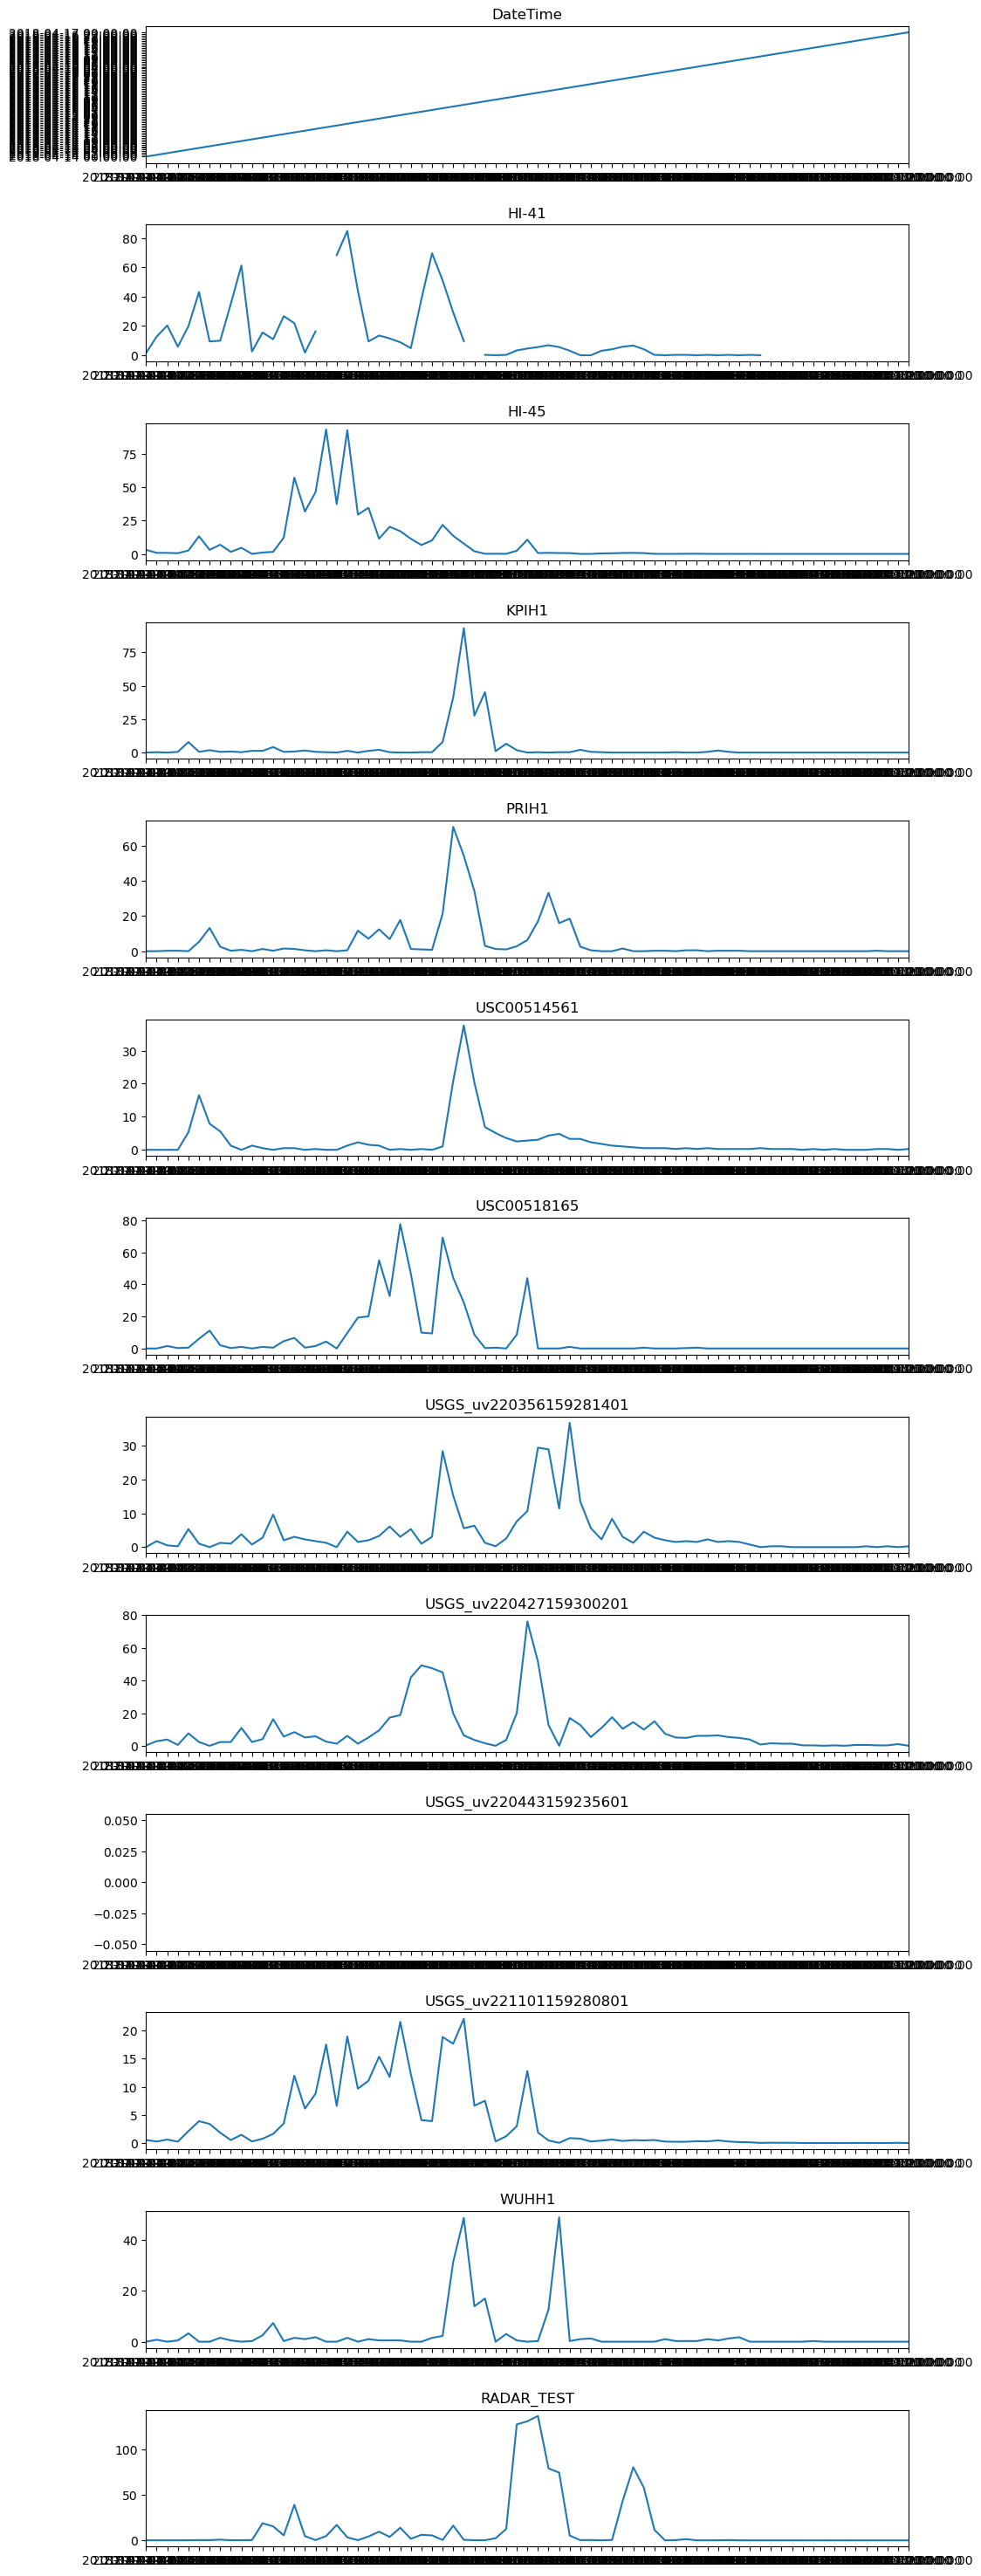

In [42]:
gages_names = (gages_data.columns.tolist())[2:]

fig, axs= plt.subplots(len(gages_names), figsize=(10,30))
fig.tight_layout(pad=3.0)

for i in range(0, len(gages_names)):
    axs[i].plot(gages_data['DateTime'], gages_data[gages_names[i]])
    axs[i].set_title(gages_names[i])
    axs[i].set_xlim((gages_data['DateTime'].min()), (gages_data['DateTime'].max()))

# Export Data

In [117]:
gages_data.to_csv(all_rain_gages_data[:-4] + 'filled_NA_radar.csv')